In [ ]:
# Импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Импорт файда с данными
data = pd.read_csv('xageur_d.csv')

In [26]:
# Расчет доходности
data['r'] = data['Close'][1:] \
.reset_index(drop=True)/data['Close'][:-1] \
.reset_index(drop=True)-1

In [27]:
# Расчет скользящих средних
short = 5
long = 12
data['SMA'] = data['Close'].rolling(short).mean()
data['LMA'] = data['Close'].rolling(long).mean()

In [28]:
# Избавление от ненужных строк
data = data.drop(len(data)-1)
data = data.drop(data.index[0:long-1])

In [29]:
# Расчет доходности стратегии
data['strategy'] = data['r']*(data['SMA']>data['LMA']) \
- data['r']*(data['SMA']<data['LMA'])

Доходность стратегии скользящих средних -1.41%
Доходность стратегии buy and hold 4.32%


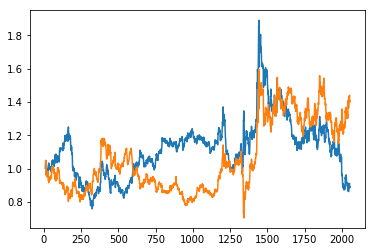

In [33]:
# Визуализация результата
plt.plot(np.cumprod(1+data['strategy']))
plt.plot(np.cumprod(1+data['r']))
r_strat = np.prod(1+data['strategy'])**(252/len(data['strategy'])) - 1
r_bhh = np.prod(1+data['r'])**(252/len(data['r'])) - 1
print('Доходность стратегии скользящих средних '+str(round(r_strat*100, 2))+ '%')
print('Доходность стратегии buy and hold '+str(round(r_bhh*100, 2))+ '%')